


  
<h2 align="center">
    Project: Sentiment Analysis of Movie Reviews
</h2>





**Project Description:**

This project is a sentiment analysis model to classify a given review as positive or negative. Sentiment Analysis leverages both Natural Language Processing and Machine Learning skills - how to represent text in a machine-understandable format so as to classify the text and extract sentiment. We do visualizations  and deploy models in the real world.


---
---

Set up your environment, install the required packages, acces data and apply some basic exploratory data analysis.



Setting up libraries and installing packages

To install a library:
```python
 import <library> as <shortname>
```
We use a *short name* since it is easier to refer to the package to access functions and also to refer to subpackages within the library.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2

from wordcloud import WordCloud, STOPWORDS


Library requirements


- **Pandas:**
Pandas' data analysis facilities provide a powerful substrate for cross- referencing and analyzing the outputs of NLP models in order to pinpoint potentially-incorrect labels.

- **NLTK:**
NLTK (Natural Language Toolkit) is a popular Python library for natural language processing (NLP). It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc…


---



Let’s access our data. We will be using the Internet Movie Database (IMDb) as our dataset. The dataset contains 50,000 movie reviews from the Internet Movie Database. Reviews have been pre-labeled with sentiment polarity (positive/negative).  


[The IMDb Movie Reviews dataset is available at this link](https://raw.githubusercontent.com/meghjoshii/NSDC_DataScienceProjects_SentimentAnalysis/main/IMDB%20Dataset.csv). It is better to use the link provided directly within the read_csv function.



We will use pandas to read the data from the csv file using the `read_csv` function. This function returns a pandas dataframe. We will store this dataframe in a variable called `df`.

In [5]:
#  Read the data using pandas read_csv function
df=pd.read_csv('https://raw.githubusercontent.com/meghjoshii/NSDC_DataScienceProjects_SentimentAnalysis/main/IMDB%20Dataset.csv')


---

Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataframe.

In [3]:
#  Print the first 5 rows of the data using head function of pandas
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


There are 2 columns in the dataframe - `review` and `sentiment`. The `review` column contains the text of the review and the `sentiment` column contains the sentiment of the review.

The `describe()` function gives us a summary of the data.

In [4]:
#  Describe the data using describe function of pandas
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


We can see that we have 50,000 reviews in our dataset. The `sentiment` column has 2 unique values - `positive` and `negative`.

Individual columns can be accessed using the `[]` operator. For example, `df['review']` returns the `review` column of the dataframe.

In [5]:
print(df['review'])

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


Let's see how many positive and negative reviews we have in our dataset. We can use the `value_counts()` function to get the count of each unique value in the `sentiment` column.

In [6]:
#  Use the value_counts function to count the number of positive and negative reviews on the sentiment column using the [] operator
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


We can see that we have 25,000 positive reviews and 25,000 negative reviews in our dataset. They are evenly distributed and we do not have to worry about class imbalance.

[Reference: Class imbalance](https://machinelearningmastery.com/what-is-imbalanced-classification/).


---


The **objective** of our machine learning model will be to predict the sentiment of a review given the text of the review. So, the model needs to learn the relationship between the text of the review and the sentiment of the review. Hence, this is a supervised learning problem where the input is text and the output is a label.

[References: introductory videos and about supervised machine learning](https://www.youtube.com/playlist?list=PLNs9ZO9jGtUCiGTo3iP0qmI9_qi8oYaRN).



Since we are going to be using text as input, we cannot directly use the text because computers do not understand text. We need to convert the text into a format that is useful for our classification model.

Count vectorization is a method to convert text into a format that is useful for classification models. It converts the text into a matrix of token counts meaning that each row in the matrix represents a review and each column represents a word. The value in each cell is the number of times that word occurs in that review. So, by learning the frequency of each word in each review, the model can learn the relationship between the text and the sentiment of the review. The intuition behind this is that positive reviews will have more positive words and negative reviews will have more negative words.

Now that we have established the intuition behind count vectorization, let's look at features of the count vectorizer. The features of the count vectorizer are the words that we want to consider. We would only want to use words that are relevant to the sentiment of the review. For example, if we are classifying reviews of movies, we would not want to consider words like `the`, `a`, `an` etc. because they are not relevant to the sentiment of the review. Also, we would want to consider words that occur frequently in the reviews. For example, if a word occurs only once in the entire dataset, it is not very useful for our model.

To remove words that are not relevant to the sentiment of the review, first we need to tokenize the text.

Tokenization is the process of splitting a string into a list of tokens. This helps us to break down the text into smaller chunks which are easier to work with. What we essentially want to do  is remove all the punctuation and special characters from the text because they do not add any value to the text. We also want to convert all the text to lowercase so that the model does not treat the same word with different cases as different words.

---
---



<h3 align = "center">
    Data Preprocessing
</h3>

Use the NLTK library to preprocess
 and  use countVectorizer class to convert text into a format that is useful for classification models.

We will use the `nltk` library to perform these preprocessing steps. First, we will use the `word_tokenize` function to tokenize the text.

In [6]:
# We apply the word_tokenize function to the reviews in the dataset and assign the tokenized reviews to the existing column in the dataset.
# We can use the apply function to apply the word_tokenize function to the reviews column in the dataset.
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Ensure all reviews are strings before tokenization
df['review'] = df['review'].astype(str)

df['review'] = df['review'].apply(nltk.word_tokenize)

In [9]:
# We can see that the `review` column now contains a list of tokens for each review. Let's see what the first review looks like.
df['review'][1]

['A',
 'wonderful',
 'little',
 'production',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming-',
 'very',
 'old-time-BBC',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 ',',
 'and',
 'sometimes',
 'discomforting',
 ',',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen-',
 'Michael',
 'Sheen',
 'not',
 'only',
 '``',
 'has',
 'got',
 'all',
 'the',
 'polari',
 "''",
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 '!',
 'You',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'Williams',
 "'",
 'diary',
 'entries',
 ',',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 '.',
 'A',
 'masterful

We see that the text has been tokenized into a list of words. Also, the list contains punctuation and special characters which we do not want.

---

**Removing stopwords, punctuations etc.**


Let's clean the text by removing punctuations, special characters and converting the text to lowercase. We will use the `isalpha` function to check if a word is an alphabet. If it is not an alphabet, we will remove it from the list. We will also convert the text to lowercase using the `lower` function. Next, we will remove the stopwords from the list. Stopwords are words that do not add any value to the text. For example, `the`, `a`, `an` etc. are stopwords. We will use the `stopwords` function from the `nltk.corpus` package to get a list of stopwords. We will then use the `remove` function to remove the stopwords from the list.

In [8]:
# isalpha() function returns True if all the characters in the string are alphabets. If not, it returns False.

# We can use the isalpha() function to remove all the punctuations and numbers from the reviews.

df['review'] = df['review'].apply(lambda x: [item for item in x if item.isalpha()])


In [11]:
print(" ".join(df['review'][1]))

A wonderful little production br br The filming technique is very very fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br The actors are extremely well Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great master of comedy and his life br br The realism really comes home with the little things the fantasy of the guard which rather than use the traditional techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwell murals decorating every surface are terribly well done


In [9]:
# convert to lowercase

# We can use the lower() function to convert all the words in the reviews to lowercase.
df['review'] = df['review'].apply(lambda x: [item.lower() for item in x])

In [13]:
df

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, br, br, the...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, a, family, where, a, little...",negative
4,"[petter, mattei, love, in, the, time, of, mone...",positive
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[i, am, a, catholic, taught, in, parochial, el...",negative
49998,"[i, going, to, have, to, disagree, with, the, ...",negative


In [10]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['review'] = df['review'].apply(lambda x: [item for item in x if item not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",positive
1,"[wonderful, little, production, br, br, filmin...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, thinks,...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive
...,...,...
49995,"[thought, movie, right, good, job, creative, o...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[going, disagree, previous, comment, side, mal...",negative


---

**Stemming**

Now that we have cleaned the text, we need to use a stemmer to stem the words. Stemming is the process of reducing a word to its root form. For example, the root form of the word `running` is `run`. Stemming helps us to reduce the number of unique words in the text. We will use the `PorterStemmer` function from the `nltk.stem` package to stem the words.

In [11]:
# stemming user PorterStemmer

from nltk.stem import PorterStemmer
ps = PorterStemmer()

df['review'] = df['review'].apply(lambda x: [ps.stem(item) for item in x])


In [17]:
df

,review,sentiment
0,"[one, review, mention, watch, oz, episod, hook...",positive
1,"[wonder, littl, product, br, br, film, techniq...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, famili, littl, boy, jake, think, zombi...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive
...,...,...
49995,"[thought, movi, right, good, job, creativ, ori...",positive
49996,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",negative
49997,"[cathol, taught, parochi, elementari, school, ...",negative
49998,"[go, disagre, previou, comment, side, maltin, ...",negative


In [12]:
#join list of words to form sentences
df['review'] = df['review'].apply(lambda x: " ".join(x))

In [19]:
df

,review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product br br film techniqu fashi...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job creativ origin fir...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,go disagre previou comment side maltin one sec...,negative


# Data Splitting
---



Split the dataset into training and testing sets. Use the CountVectorizer class to convert text into a format that is useful for classification models & use the MultinomialNB class to train a Naive Bayes classifier.

Training and Testing Data:

Machine learning uses algorithms to learn from data in datasets. They find patterns, develop understanding, make decisions, and evaluate those decisions.

In machine learning, datasets are split into two subsets:

The first subset is known as the **training data** - it’s a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns. In this way, it trains our model.

The other subset is known as the **testing data**.

Once your machine learning model is built (with your training data), you need unseen data to test your model. This data is called testing data, and you can use it to evaluate the performance and progress of your algorithms’ training and adjust or optimize it for improved results.

Testing data has two main criteria. It should:

1. Represent the actual dataset
2. Be large enough to generate meaningful predictions


# Data Splitting

Now, the data is tokenized, cleaned and reduced to its root form.
The next step is to split the data for training and testing. We split the data because we need to train our model on some data and test it on some data. We have a total of 50,000 reviews, so let's split it into 40,000 reviews for training and 10,000 reviews for testing.
To do this, we can use the slice operator `:`. For example, `df[:30000]` returns the first 30,000 rows of the dataframe. Similarly, `df[30000:]` returns the last 20,000 rows of the dataframe.

Name the training data as `train_reviews` and testing data as `test_reviews`. Remember, we are only splitting the reviews column and will do the same for sentiment in the next step.

In [13]:
#train reviews
train_reviews = df.review[:40000]

In [14]:
#test reviews
test_reviews = df.review[40000:]

Now let us do the same for the sentiment column. Name the training data as `train_sentiments` and testing data as `test_sentiments`.

In [15]:
# train sentiments
train_sentiments = df.sentiment[:40000]

In [16]:
# test sentiments
test_sentiments=df.sentiment[40000:]

# Data Preparation




We need to make a few changes to the data before we can use it to train our model. First, we need to convert the data into a format that is useful for our model. We will use the `CountVectorizer` function from the `sklearn.feature_extraction.text` package to convert the text into a matrix of token counts.

For the sentiment column, we need to convert the labels into numbers. We will use the `LabelEncoder` function from the `sklearn.preprocessing` package to convert the labels into numbers.

[References: Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and  [ Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). The parameters of both these functions should be  better understood.

In [17]:
#Count vectorizer for bag of words
#By changing min_df to 1, you ensure that only tokens that appear in at least one document are included in the vocabulary.
cv = CountVectorizer(min_df=1, max_df=1, binary = False, ngram_range = (1,3))

To transform the data, we will use the `fit_transform` function. The `fit_transform` function fits the model to the data and then transforms the data into a matrix of token counts. We will use the `fit_transform` function on the training data and the `transform` function on the testing data. This is because we only want to fit the model to the training data and not the testing data.

In [18]:
#transformed train reviews
cv_train_reviews = cv.fit_transform(train_reviews)

In [19]:
#transformed test reviews
cv_test_reviews = cv.transform(test_reviews)

Again, for the sentiment column, we will use the `fit_transform` function on the training data and the `transform` function on the testing data.

In [20]:
#labeling the sentient data
lb = LabelBinarizer()

In [21]:
# transformed sentiment data
lb_train_sentiments = lb.fit_transform(train_sentiments)

In [22]:
# transformed test sentiment data (similar to count vectorizer, transform test reviews, name it lb_test_sentiments)
# Remember to use transform and not fit_transform
lb_test_sentiments = lb.transform(test_sentiments)


---



# Model Building:
 In this step, we will build our model. We will use the `MultinomialNB` function from the `sklearn.naive_bayes` package to build our model. The Multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. Bag-of-Word counts are an example of integer-valued discrete features.

[Reference: Multinomial Naive Bayes classifier here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

- **Machine Learning Classifiers:**
Machine learning classifiers are algorithms that classify data points using various methods such as:

Support Vector Machine (SVM)

Uses a hyperplane to classify data points in N-dimensional space by maximizing the distance between the points and the hyperplane

Naive Bayes

A probabilistic classifier that uses the Maximum A Posteriori decision rule in a Bayesian setting

Decision tree

Uses rules or conditions to divide input data into two or more homogeneous data sets based on defining attributes


- **Naive Bayes Classifier:**
The Naïve Bayes classifier is a popular supervised machine learning algorithm used for classification tasks such as text classification. It belongs to the family of generative learning algorithms, which means that it models the distribution of inputs for a given class or category.

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.




The first part is to train and fit the Multinomial Naive Bayes classifier to the training data. We will use the `fit` function to train the model on the training data.

In [33]:
# training the model
mnb = MultinomialNB()

In [37]:
# fitting the model
mnb_bow = mnb.fit(cv_train_reviews, lb_train_sentiments)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#Predicting the model for bag of words
mnb_bow_predict = mnb_bow.predict(cv_test_reviews)


In [39]:
#Accuracy score for bag of words
mnb_bow_score = accuracy_score(lb_test_sentiments, mnb_bow_predict)
print("Accuracy :", mnb_bow_score)

Accuracy : 0.7425


 see an accuracy of ~70-80%. This is decent, but not a very good accuracy since language is a very complex thing. But it's a great start!

---
---

In [45]:
 #logistic regression for bag of words

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if you encounter convergence warnings

# Train the model
lr_bow = lr.fit(cv_train_reviews, lb_train_sentiments.ravel())

# Predict on the test data
lr_bow_predict = lr_bow.predict(cv_test_reviews)

# Calculate accuracy
lr_bow_score = accuracy_score(lb_test_sentiments, lr_bow_predict)
print("Logistic Regression Accuracy:", lr_bow_score)


Logistic Regression Accuracy: 0.6108


Logistic regression is a data analysis technique that can be used for sentiment analysis of reviews because it's a simple model that's easier to set up and train than other machine learning models. Logistic regression uses math to find relationships between two data factors and then uses those relationships to predict the value of one factor based on the other. The predictions usually have a limited number of outcomes, like yes or no. Here it is either positive / negative sentiment.

we'll use the extracted features to predict the sentiment of a review. Logistic regression is useful for this as it uses a sigmoid function to output a probability between zero and one.

Here the obtained accuracy is 61.08 %

Preferred ***feature selection over dimensionality reduction ***to avoid memory issues during runtime.

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the top k features
k = 1000  # Adjust based on your dataset size
selector = SelectKBest(chi2, k=k)
cv_train_reviews_reduced = selector.fit_transform(cv_train_reviews, lb_train_sentiments)
cv_test_reviews_reduced = selector.transform(cv_test_reviews)

# Train the SVM model
svm = SVC(kernel='linear')  # You can adjust the kernel as needed
svm_bow = svm.fit(cv_train_reviews_reduced, lb_train_sentiments.ravel())

# Predict using the SVM model
svm_bow_predict = svm.predict(cv_test_reviews_reduced)

# Calculate accuracy
svm_bow_score = accuracy_score(lb_test_sentiments, svm_bow_predict)
print("SVM Accuracy:", svm_bow_score)


SVM Accuracy: 0.5003


By finding an optimal hyperplane, **SVM** separates sentiment classes effectively, achieving high accuracy in sentiment prediction. SVM's ability to handle high-dimensional feature spaces makes it a popular choice in sentiment analysis tasks.

In this bag-of-words model you only take individual words into account and give each word a specific subjectivity score. This subjectivity score can be looked up in a sentiment lexicon. If the total score is negative the text will be classified as negative and if its positive the text will be classified as positive.



***SVM Accuracy: 50.03%***

In [44]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Select the top k features
k = 1000  # Adjust based on your dataset size
selector = SelectKBest(chi2, k=k)
cv_train_reviews_reduced = selector.fit_transform(cv_train_reviews, lb_train_sentiments)
cv_test_reviews_reduced = selector.transform(cv_test_reviews)

# Train the Decision Tree model
dt = DecisionTreeClassifier(max_depth=10)  # Adjust max_depth as needed
dt_bow = dt.fit(cv_train_reviews_reduced, lb_train_sentiments.ravel())

# Predict using the Decision Tree model
dt_bow_predict = dt.predict(cv_test_reviews_reduced)

# Calculate accuracy
dt_bow_score = accuracy_score(lb_test_sentiments, dt_bow_predict)
print("Decision Tree Accuracy:", dt_bow_score)


Decision Tree Accuracy: 0.4993


Decision Trees provide a clear and understandable model for text classification, making them an excellent choice for tasks where interpretability is as important as predictive power.



Here, Decision Tree Accuracy: 49.93% which is lower than the SVM Accuracy(50.03 %), logistic(61%) and multiNB model(74%).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the top k features
k = 1000  # Adjust based on your dataset size
selector = SelectKBest(chi2, k=k)
cv_train_reviews_reduced = selector.fit_transform(cv_train_reviews, lb_train_sentiments)
cv_test_reviews_reduced = selector.transform(cv_test_reviews)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the parameters as needed
rf_bow = rf.fit(cv_train_reviews_reduced, lb_train_sentiments.ravel())

# Predict using the Random Forest model
rf_bow_predict = rf.predict(cv_test_reviews_reduced)

# Calculate accuracy
rf_bow_score = accuracy_score(lb_test_sentiments, rf_bow_predict)
print("Random Forest Accuracy:", rf_bow_score)


Random Forest Accuracy: 0.5001


Sentiment Analysis with Random Forest takes advantage of the Random Forest algorithm's capabilities, an ensemble learning method, to enhance the accuracy and efficiency of sentiment classification, making it a promising approach for extracting meaningful sentiment information from large textual datasets.

A random forest text classification model predicts an outcome by taking the decision trees' mean output. As you increase the number of trees, the accuracy of the prediction improves.

Random forests are easy to use, interpret and visualize.
The training time of a random forest is fast compared to many other techniques.
They are resistant to overfitting and can be used to estimate missing data.

***Random Forest Accuracy: 50.01%***

**Gradient Boost**

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the top k features
k = 1000  # Adjust based on your dataset size
selector = SelectKBest(chi2, k=k)
cv_train_reviews_reduced = selector.fit_transform(cv_train_reviews, lb_train_sentiments)
cv_test_reviews_reduced = selector.transform(cv_test_reviews)

# Train the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust the parameters as needed
gb_bow = gb.fit(cv_train_reviews_reduced, lb_train_sentiments.ravel())

# Predict using the Gradient Boosting model
gb_bow_predict = gb.predict(cv_test_reviews_reduced)

# Calculate accuracy
gb_bow_score = accuracy_score(lb_test_sentiments, gb_bow_predict)
print("Gradient Boosting Accuracy:", gb_bow_score)


Gradient Boosting Accuracy: 0.4997


Gradient boosting has several advantages over random forests. They are more accurate and powerful, since they use gradient descent and residuals to optimize the ensemble and reduce the bias. They are also more flexible, since they can use any differentiable loss function or regularization technique to fit the data.

# Conclusion

**As it is a balanced dataset and also a classification task, we can use accuracy as metric for evaluation of performance of models on it. **



# Multinomial Naive Bayes has performed the best for this task on this IMDB dataset of 50000 rows out of all the above models trained above and evaluated based on accuracy as measure of performance.

The order of their performances in descendeing order is  as follows:

MultinomialNaive Bayes: 74.25%

Logistic Regression: 61.08%

SVM Accuracy: 50.03%

Random Forest Accuracy: 50.01%

Gradient Boosting Accuracy: 49.97%

Decision Tree Accuracy: 49.93%

<ipython-input-50-bbfab604d1e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


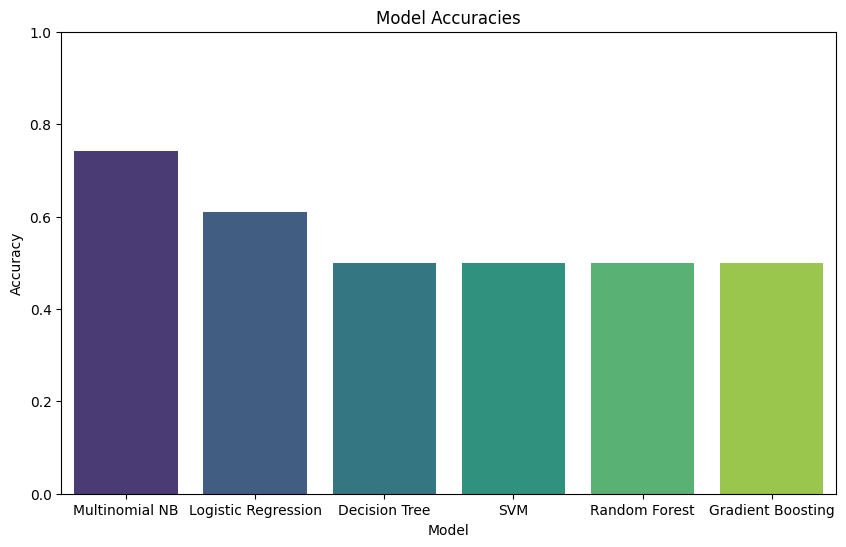

In [50]:
models = ['Multinomial NB', 'Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting']
accuracies = [mnb_bow_score, lr_bow_score, dt_bow_score, svm_bow_score, rf_bow_score, gb_bow_score]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.0, 1.0)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


A ***confusion matrix ***to visualize the performance of the sentiment analysis model.

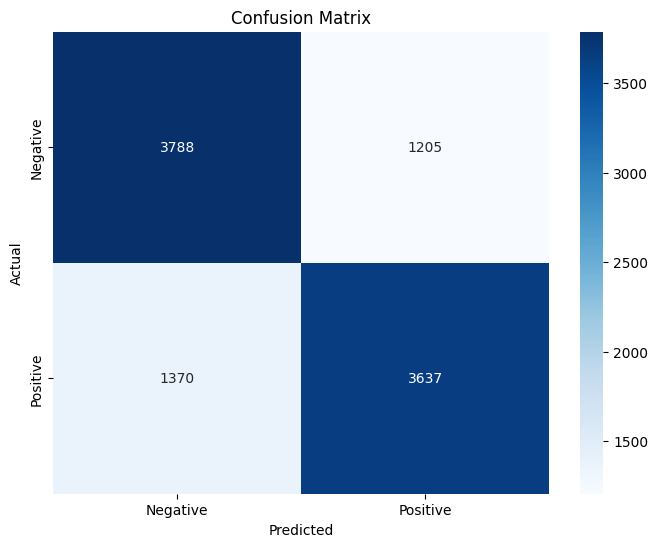

In [40]:
from sklearn.metrics import confusion_matrix

#  the confusion matrix
cm = confusion_matrix(lb_test_sentiments, mnb_bow_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Precision: The ratio of true positive predictions to the total number of positive predictions made by the model. It answers the question, "Of all the positive predictions made, how many were actually positive?"

Precision
=
True Positives/(
True Positives
+
False Positives)

​

Recall: The ratio of true positive predictions to the total number of actual positive instances. It answers the question, "Of all the actual positive instances, how many were correctly identified by the model?"

Recall
=
True Positives/(
True Positives
+
False Negatives
)


Here TP=  3637, FP=1205 , TN=3788 , FN=1370
Precision= (3637/(3637+1205))*100=75.11%
Recall= (3637/(3637+1370))*100 = 72.64%

THese two metrics show good balance and performing fairly good but needs improvement.

The ***ROC curve *** provides a graphical representation of the trade-off between the true positive rate and false positive rate.

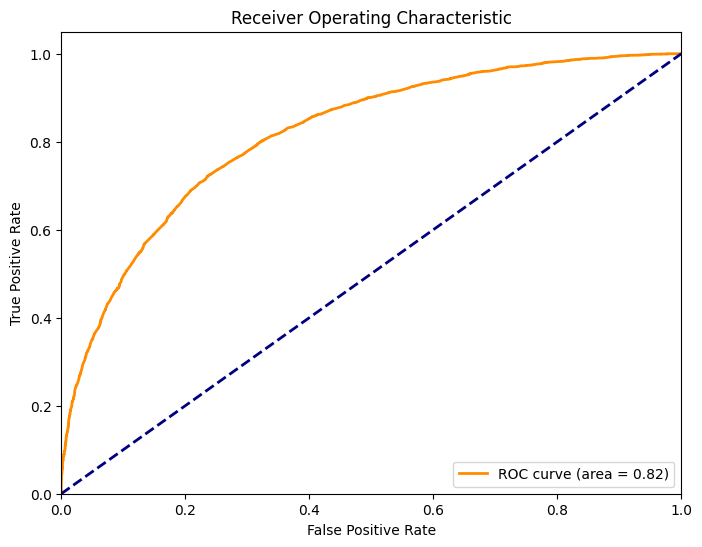

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability scores for the positive class
mnb_probabilities = mnb_bow.predict_proba(cv_test_reviews)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(lb_test_sentiments, mnb_probabilities)
roc_auc = roc_auc_score(lb_test_sentiments, mnb_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The ROC curve itself can also be used to interpret a model's performance. ***Classifiers that produce curves closer to the top-left corner of the graph indicate better performance. ***This is because in the upper left corner, the sensitivity(tpr) is 1 and the false positive rate is 0, resulting in a specificity of 1. A curve that is closer to the 45-degree diagonal of the ROC space, on the other hand, indicates less accurate performance.

In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

***Here, it is roc-auc scored 0.82 which can be considered excellent.***

---

Data Visualizations are a great way to understand the data. [Reference: additional resources on Data Visualization. Recommended:  leveraging the DSRR resources, linked here.](https://nebigdatahub.org/nsdc/data-science-resource-repository/) We will be using word clouds to visualize the data. Word clouds are a great way to visualize the most frequent words in a text. We will use the `WordCloud` function from the `wordcloud` package to visualize the most frequent words in the reviews.

[Reference: the WordCloud function here](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html).



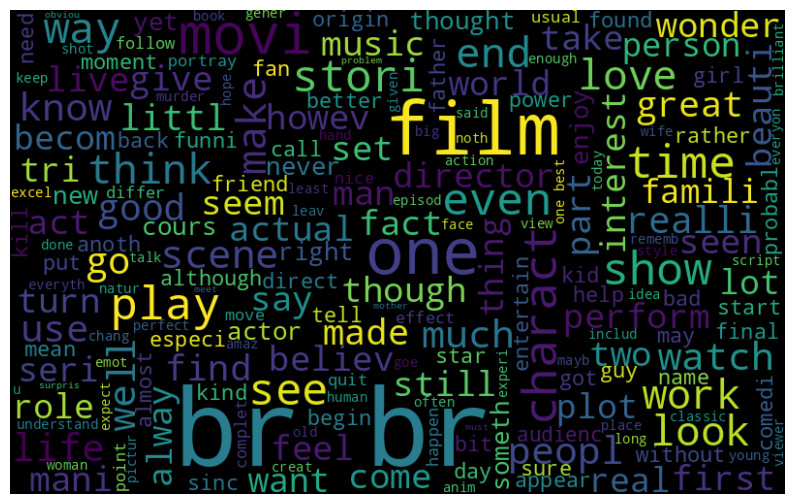

In [27]:
# word cloud for positive review words in the entire dataset
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#join all the positive reviews
positive_words = ' '.join(list(df[df['sentiment'] == 'positive']['review']))

#word cloud for positive words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



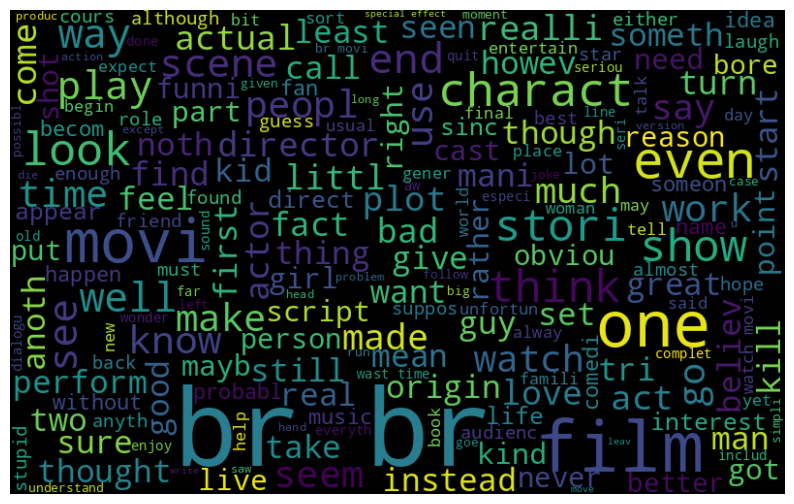

In [28]:
#  Word cloud for negative reviews in the dataset
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#join all the negative reviews
negative_words = ' '.join(list(df[df['sentiment'] == 'negative']['review']))

#word cloud for negative words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


---

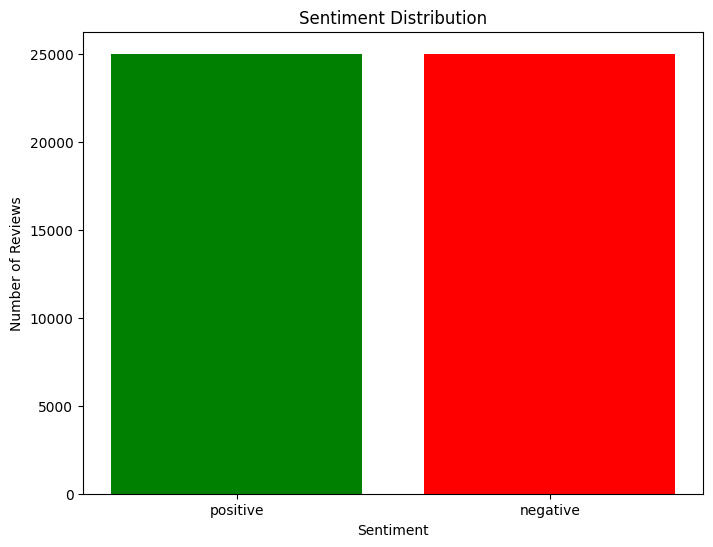

In [29]:
#  the matplotlib package to make a visualization of sentiment analysis

import matplotlib.pyplot as plt

#  'df' is  DataFrame with 'sentiment' and 'review' columns

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


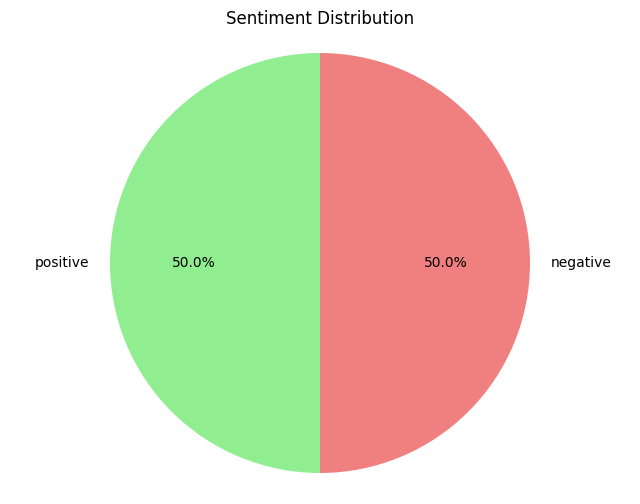

In [30]:

#  Piechart for visualization of sentiment analysis of reviews using seaborn


#  'df' is  DataFrame with 'sentiment' and 'review' columns

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart using seaborn
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


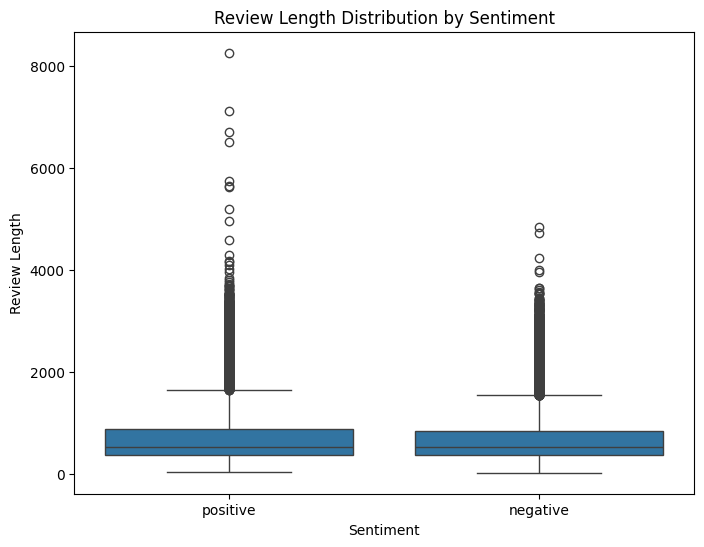

In [31]:

#  Box plot for visualization of sentiment analysis of reviews using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# 'df' is  DataFrame with 'sentiment' and 'review' columns

# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y=df.review.str.len(), data=df)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


# Sentiment Distribution by Review Length

Visualization of how sentiment scores are distributed with respect to the length of reviews. This can provide insights into whether longer reviews tend to be more positive or negative.

<ipython-input-52-440c6c8e8e53>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='review_length', y='sentiment', data=df, alpha=0.5, palette='coolwarm')


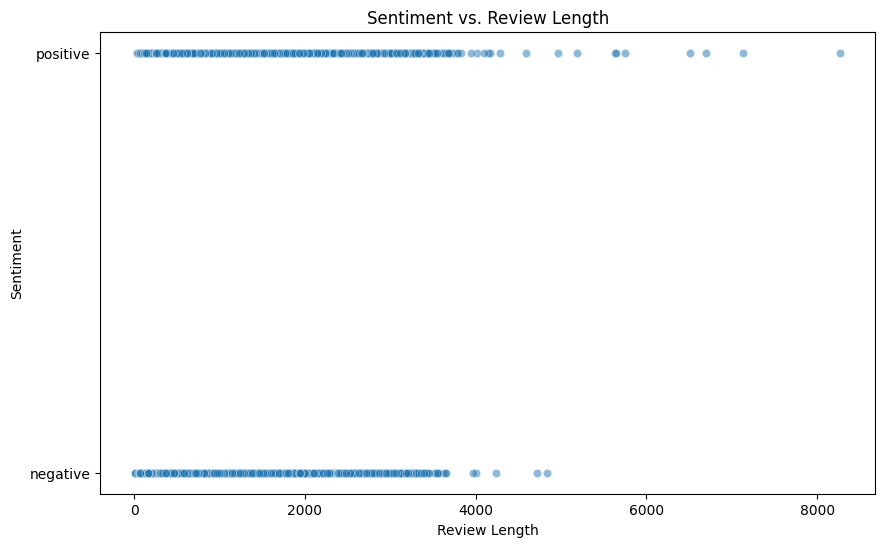

In [52]:
# Calculate the length of each review
df['review_length'] = df['review'].apply(len)

# Plot sentiment distribution by review length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='sentiment', data=df, alpha=0.5, palette='coolwarm')
plt.xlabel('Review Length')
plt.ylabel('Sentiment')
plt.title('Sentiment vs. Review Length')
plt.show()


# Heatmap of Sentiment Scores by Review
Created a heatmap of sentiment scores for a subset of reviews. This can show the ***intensity of sentiment*** across different reviews.

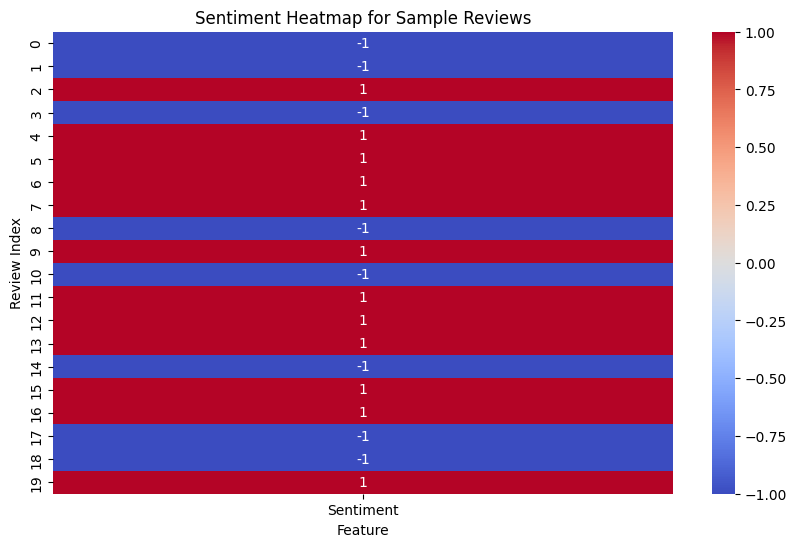

In [54]:
import numpy as np

# Sample a subset of reviews for heatmap
subset_reviews = df.sample(n=20)

# Create a matrix of review indices and sentiment scores
# Convert sentiment labels to numerical values (e.g., positive=1, negative=-1, neutral=0)
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}  # Adjust mapping as needed
matrix = subset_reviews['sentiment'].map(sentiment_mapping).values.reshape(-1, 1)  # Reshape to 2D array
indices = np.arange(len(subset_reviews))

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, xticklabels=['Sentiment'], yticklabels=indices, cmap='coolwarm')
plt.xlabel('Feature')
plt.ylabel('Review Index')
plt.title('Sentiment Heatmap for Sample Reviews')
plt.show()

---
---

<h3 align = 'center' >
Thank you.
</h3>


